# Rendering 3 D model

The 3d point cloud models used in this notebook are courtesy of Stanford 3D Scanning Repository and Large Geometric Models Archive at the Georgia Institute of Technology

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

downsample_factor = 50
names = ['dragon','hand', 'happy']
colors =['darkorange', 'brown', 'blue']

matplotlib.style.use('ggplot')

path = '../Downloads/'

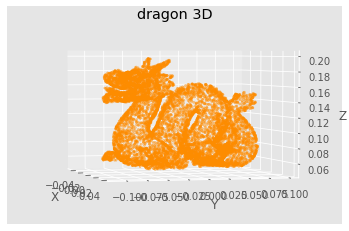

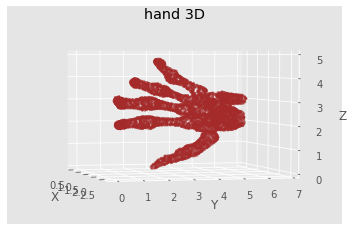

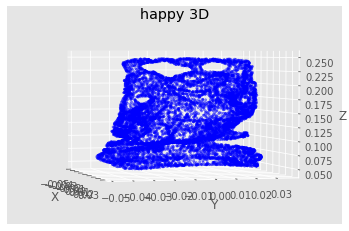

In [56]:
for n in range(len(names)):
    plyfile = PlyData.read(path + names[n] +'.ply' )
    model = pd.DataFrame({
      'x':plyfile['vertex']['z'][::downsample_factor],
      'y':plyfile['vertex']['x'][::downsample_factor],
      'z':plyfile['vertex']['y'][::downsample_factor]
    })
    # Render the model
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(names[n] + ' 3D')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter(model.x, model.y, model.z, c=colors[n], marker='.', alpha=0.45)
    ax.view_init(elev=3., azim=-15)

    plt.show()

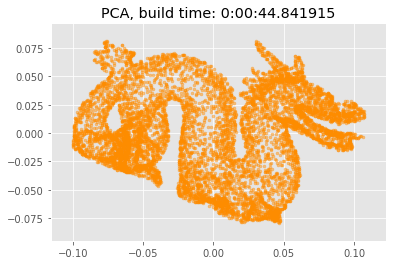

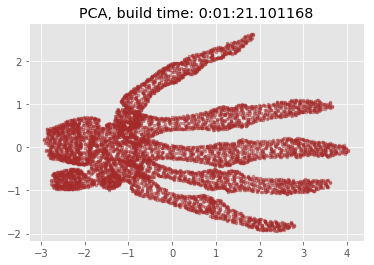

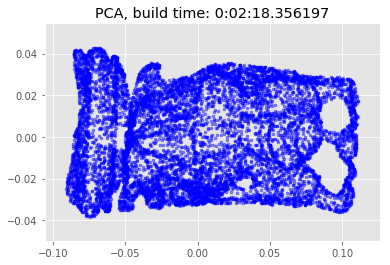

In [52]:
from sklearn.decomposition import PCA

def do_PCA(model):
  pca = PCA().fit_transform(model)
  return pca

def do_RandomizedPCA(model):
  rpca = PCA(random_state=True).fit_transform(model)
  return rpca

t1 = datetime.datetime.now()

for n in range(len(names)):
    plyfile = PlyData.read(path + names[n] +'.ply' )
    model = pd.DataFrame({
      'x':plyfile['vertex']['z'][::downsample_factor],
      'y':plyfile['vertex']['x'][::downsample_factor],
      'z':plyfile['vertex']['y'][::downsample_factor]
    })
    for i in range(5000): pca = do_PCA(model)
    time_delta = datetime.datetime.now() - t1

    if not pca is None:
      fig = plt.figure()
      ax = fig.add_subplot(111)
      ax.set_title('PCA, build time: ' + str(time_delta))
      ax.scatter(pca[:,0], pca[:,1], c=colors[n], marker='.', alpha=0.45)

    plt.show()

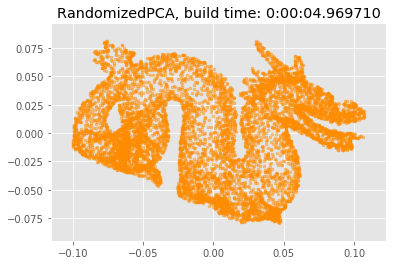

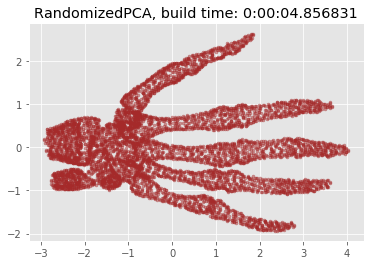

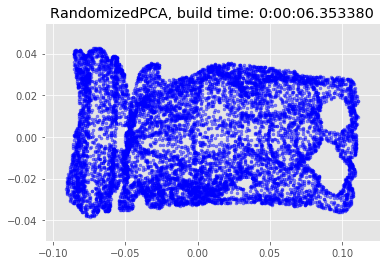

In [55]:
for n in range(len(names)):
    plyfile = PlyData.read(path + names[n] +'.ply' )
    model = pd.DataFrame({
      'x':plyfile['vertex']['z'][::downsample_factor],
      'y':plyfile['vertex']['x'][::downsample_factor],
      'z':plyfile['vertex']['y'][::downsample_factor]
    })
    for i in range(5000): pca = do_PCA(model)
    time_delta = datetime.datetime.now() - t1

    # Time the execution of rPCA 5000x
    t1 = datetime.datetime.now()
    for i in range(5000): rpca = do_RandomizedPCA(model)
    time_delta = datetime.datetime.now() - t1

    if not rpca is None:
      fig = plt.figure()
      ax = fig.add_subplot(111)
      ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
      ax.scatter(rpca[:,0], rpca[:,1], c=colors[n], marker='.', alpha=0.45)
    plt.show()